<a href="https://colab.research.google.com/github/edwardoughton/satellite-image-analysis/blob/main/1_1_ggs416_26_01_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛰️ GGS 416 Satellite Image Analysis — Week 1 🛰️

Here we will focus on the foundations of Python programming for satellite image analysis.

There will be a tutorial followed by a set of exercises.



## 📗Learning objectives📗

By the end of this class, you should be able to:

* Explain what a satellite image is in computational terms
* Load a GeoTIFF file in Python / Jupyter Notebooks
* Inspect raster file metadata
* Display single-band or Red-Green-Blue (RGB) three-band images
* Treat images as numerical arrays


## What is a satellite image? 📷

A satellite image is:

* A 2D array (per band) of pixel values
* Each pixel represents a physical measurement (e.g., radiance or reflectance)
* Pixel values are often stored as normalized values (e.g., between 0 and 1), but may also be stored as integers depending on the sensor and processing level
* Often consists of multiple spectral bands (forming a 3D array when stacked)

By ‘2D array’, I mean a data structure that stores elements in a table-like structure with x rows and y columns.

Here, we will work with:

* GeoTIFF files (.tif) (Georeferenced Tagged Image File Format)
* Python arrays
* Raster metadata (Coordinate Reference System, resolution, extent etc.)


## Why is Python great for satellite image analysis?

Python is a fantastic programming language, as it is just about the most powerful option which still allows us to logically read the code.

In addition, using such a powerful language enables us to:

* Automate satellite image processing (and thus scale any analysis)
* Utilize the very broad family of open-source libraries for scientific computing, remote sensing, machine learning and other statistical domains
* Easily switch between exploratory analysis, and full-stack application development, should we desire that flexibility at some point (e.g., adding a web-GIS platform, or website capabilities)


A satellite image is just a matrix of numbers with geographic meaning.

## Importing required Python libraries

For specialist activities, we need to load in bespoke libraries. For example, below we will import `numpy`, `matplotlib`, and a function from `rasterio`:

* `numpy` → numerical arrays
* `matplotlib` → plotting
* `rasterio` → reading satellite images

In [ ]:
# Example
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

If we just say `import numpy`, then we import the whole package.

Using the `as` statement indicates we want to load it in using a shorter name so we can refer to it in the code as just `np`. You will see this a lot.

By contrast, when we do the `from rasterio.plot import show` we are saying we do not want to load in the whole `rasterio` package, instead we just want one function called `show` from the submodule `plot`.

## Load a satellite image

Here we will get started by loading in a satellite image, for example, a provided Landsat GeoTIFF on the Canvas class site.

First, on Canvas within the GGS416 page, click the 'Files' tab on the left-hand dropdown menu. Then download image `LC08_L1TP_015033_20260119_20260119_02_RT_refl.tif`.

Landsat products follow a standardized naming convention in which each component of the filename encodes metadata about the satellite, processing level, acquisition geometry, and acquisition date.

For the file
`LC08_L1TP_015033_20260119_20260119_02_RT_refl.tif`, the elements can be interpreted as follows:

* LC08 — Identifies the satellite and sensor.
  * L = Landsat program
  * C = OLI/TIRS combined instrument
  * 08 = Landsat 8
* L1TP — Indicates the processing level and correction type.
  * L1 = Level-1 product
  * T = Precision Terrain correction
  * P = Precision geolocation
* 015033 — Path and row of the scene in the Worldwide Reference System (WRS-2).
  * 015 = orbital path
  * 033 = row
* 20260119 — Acquisition date of the image (YYYYMMDD).
  * January 19, 2026
* 20260119 — Processing date of the product (YYYYMMDD).
  * January 19, 2026
* 02 — Collection number.
  * Indicates the second major reprocessing of Landsat data (Collection 2).
* RT — Product type.
  * RT = Real-Time product (preliminary, not yet fully validated)
* refl.tif — File content and format.
  * refl = surface reflectance data
  * .tif = GeoTIFF image format

This should help you understand that the filename identifies a Landsat 8 surface reflectance scene acquired on January 19, 2026, over WRS path 15, row 33, processed as a Level-1 precision terrain-corrected real-time product in Collection 2 format.

In [26]:
#Example
import rasterio

image_path = "LC08_L1TP_015033_20260119_20260119_02_RT_refl.tif"

dataset = rasterio.open(image_path)

dataset

<open DatasetReader name='LC08_L1TP_015033_20260119_20260119_02_RT_refl.tif' mode='r'>

This returns the string representation of the Rasterio dataset object returned by `rasterio.open()`.

This means:

* DatasetReader: Rasterio has opened the file as a raster dataset
* name='LC08_L1TP_015033_20260119_20260119_02_RT_refl.tif': the file path
* mode='r': the file is opened in read-only mode
* <open …>: the file handle is currently open

It is simply Python telling us this variable is an open raster file object.

Ideally, we should open our file using a `with` statement.

We do this in the code cell below as follows:

* `with ... as dataset` is based on Python’s context manager syntax. This means we open the file at the start of the block, and then automatically close it when the block finishes, even if an error occurs.
* `rasterio.open(image_path)` opens the raster file located at image_path and returns a DatasetReader object. This object represents the raster on disk and provides access to its data and metadata.
* `dataset.read()` reads the raster data from disk into memory as a NumPy array.


In [28]:
#Example
import rasterio

image_path = "LC08_L1TP_015033_20260119_20260119_02_RT_refl.tif"

with rasterio.open(image_path) as dataset:
  image = dataset.read()

# we can now view the image as a NumPy array
print(image)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


Using the `with` statement:

* Avoids file-locking problems (especially on Windows)
* Is considered best practice when working with files

## Inspecting metadata

Metadata describes the information that explains the structure, content, and spatial properties of a dataset without containing the actual image values themselves.

For raster imagery, metadata includes details such as the file format, image dimensions, number of spectral bands, coordinate reference system (CRS), and the mathematical transform that links pixel locations to real-world geographic coordinates.

This information is essential for correctly interpreting, visualizing, and analyzing the raster data in a geographic or scientific context.

In [15]:
# Example
import rasterio

image_path = "LC08_L1TP_015033_20260119_20260119_02_RT_refl.tif"

dataset = rasterio.open(image_path)

print(dataset.meta)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 7831, 'height': 7961, 'count': 3, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32618"]]'), 'transform': Affine(30.0, 0.0, 218685.0,
       0.0, -30.0, 4426815.0)}


In [16]:
# Example
import rasterio

image_path = "LC08_L1TP_015033_20260119_20260119_02_RT_refl.tif"

dataset = rasterio.open(image_path)

print("Driver:", dataset.driver)
print("Transform:", dataset.transform)

Driver: GTiff
Transform: | 30.00, 0.00, 218685.00|
| 0.00,-30.00, 4426815.00|
| 0.00, 0.00, 1.00|


Key metadata descriptions:

* driver = the file format used to store and read the raster data (e.g., GTiff for GeoTIFF) (this is not the software driver itself)
* width = the number of pixels (columns) along the x-direction of the raster
* height = the number of pixels (rows) along the y-direction of the raster
* count = the number of raster bands in the dataset (e.g., 3 for RGB imagery)
* CRS = the coordinate reference system that defines how pixel locations relate to positions on the Earth
* transform = the affine transformation that maps pixel coordinates (row, column) to real-world map coordinates

## Exercise 1 — Exploring metadata

Write code to print:

* Width
* Height
* Number of bands
* CRS

In [13]:
# Write your answer here


## Read image data as an array

When the raster image is read using dataset.read(), the pixel values are loaded into a NumPy array in memory.

The resulting array has three dimensions arranged as (bands, rows, columns).


In [ ]:
# Example
import rasterio

image_path = "LC08_L1TP_015033_20260119_20260119_02_RT_refl.tif"

dataset = rasterio.open(image_path)

image = dataset.read()

# output will be: (bands, rows, columns)
image.shape


(3, 7961, 7831)


This means that each spectral band is stored as a separate two-dimensional array of pixel values (e.g., 7961x7961), and all bands together form a three-dimensional data cube representing the full image.

To summarize:

* The first dimension represents the number of spectral bands
* Each band is a two-dimensional array of pixel values
* Rows and columns represent the spatial layout of the image


## Inspect one band

To examine a single spectral band, we extract one layer from the multi-band image array.

As Python uses zero-based indexing, the first band is accessed at index 0 (rather than 1).

Visualizing an individual band allows us to inspect its pixel value distribution and spatial patterns independently from the other bands.

We can also create false-color composite images by mapping different spectral bands to the RGB display channels.

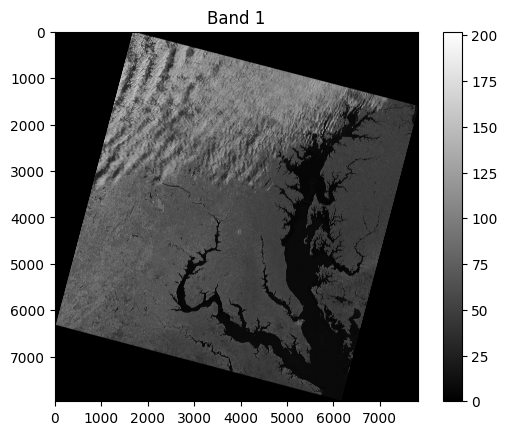

In [ ]:
# Example
import rasterio
import matplotlib.pyplot as plt

image_path = "LC08_L1TP_015033_20260119_20260119_02_RT_refl.tif"

dataset = rasterio.open(image_path)

image = dataset.read()

#the square brackets mean we index at location zero to get band 1
#remember: python is zero indexed
band1 = image[0]

plt.imshow(band1, cmap="gray")
plt.colorbar()
plt.title("Band 1")
plt.show()

Interpretation:

* Bright pixels = higher reflectance (e.g., cloud)
* Dark pixels = lower reflectance (e.g., water)

## Exercise 2 — Display a different band

Plot the second and third bands for the RGB image. Make sure you update all labels.

In [ ]:
# Write your answer here


## Display a true RGB composite

If:

* Band 1 = Red
* Band 2 = Green
* Band 3 = Blue

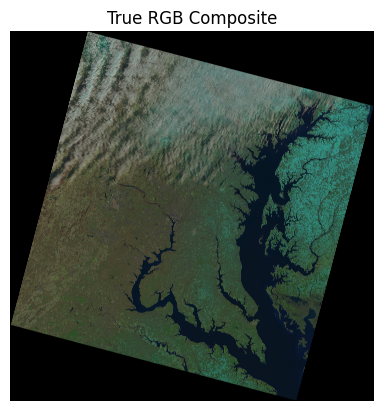

In [23]:
# Example
import rasterio
import numpy as np
import matplotlib.pyplot as plt

image_path = "LC08_L1TP_015033_20260119_20260119_02_RT_refl.tif"

dataset = rasterio.open(image_path)

image = dataset.read()

rgb = np.transpose(image, (1, 2, 0))

plt.imshow(rgb)
plt.title("True RGB Composite")
plt.axis("off")
plt.show()


The transpose here needs a bit of explanation:

* Rasterio loads as: (band, row, col)
* Matplotlib expects: (row, col, band)

Hence, rasterio returns the image array with bands first (band, row, col). To display the image as RGB, the band dimension must be moved to the end so that each pixel has its three color values together.

Thus, the transpose(image, (1, 2, 0)) operation performs this reordering to match Matplotlib’s expected format (row, col, band).


## Pixel values are numbers

In a digital raster image, each pixel stores a numerical value rather than a color itself.

These values represent measured or derived physical quantities, such as reflected light intensity in a specific spectral band.

By inspecting the minimum, maximum, and mean values of a band, we can better understand the range and distribution of the data and how these numbers are later translated into visual brightness or color when displayed.

In [24]:
# Example
import rasterio

image_path = "LC08_L1TP_015033_20260119_20260119_02_RT_refl.tif"

dataset = rasterio.open(image_path)

image = dataset.read()

band1 = image[0]

band1.min(), band1.max(), band1.mean()

(np.uint8(0), np.uint8(202), np.float64(40.53310605906643))

Hence, these numbers correspond to physical values (often reflectance or DN).

We can view the whole layer by printing the band, as shown below:

In [ ]:
# Example
print(band1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Simple array operations

As raster images are stored as numerical arrays, standard mathematical operations can be applied directly to them.

In this example, we perform a simple normalization by rescaling the pixel values of a band to a range between 0 and 1 using basic subtraction and division.

We would want to normalize pixel values so that we improve image visualization, and provide better numerical stability for calculations.  

Such array operations are commonly used in image processing to enhance contrast and prepare data for visualization or further analysis.

We will do as follows:

$$
\text{Normalized}(x) = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

Where:

- $x$ is the original pixel value,  
- $x_{\min}$ is the minimum pixel value in the band,  
- $x_{\max}$ is the maximum pixel value in the band.

0 202 40.53310605906643
0.0 1.0 0.2006589408864672


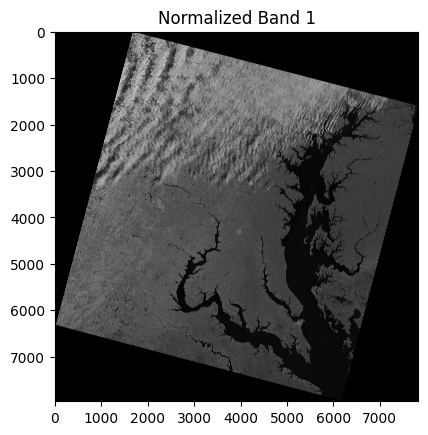

In [18]:

# Example
import rasterio
import numpy as np
import matplotlib.pyplot as plt

image_path = "LC08_L1TP_015033_20260119_20260119_02_RT_refl.tif"

dataset = rasterio.open(image_path)

image = dataset.read()

band1 = image[0]

print(band1.min(), band1.max(), band1.mean())

normalized = (band1 - band1.min()) / (band1.max() - band1.min())

print(normalized.min(), normalized.max(), normalized.mean())

plt.imshow(normalized, cmap="gray")
plt.title("Normalized Band 1")
plt.show()


This rescales values between 0 and 1.

Note that the axis ranges are the raster tile numbers (which can be used as coordinates, if needed).

## Exercise 3 - Normalization of a different band

Now have a go at normalizing bands 2 and 3.

Print the before and after min/max/means to the console (to check the code is working correctly), and visualize the images using `matplotlib`.

In [ ]:
# Place your answer here


## Cropping an image (e.g., via array slicing)

As covered already, satellite images loaded with rasterio are represented as NumPy arrays, where each band corresponds to a two-dimensional grid of pixel values (rows and columns).

As a result of this structure we can easily crop an image by applying standard array slicing operations (as we did earlier when getting a single band). We do this by specifying index ranges for rows and columns, enabling us to extract a spatial subset of the image corresponding to the region of interest.

In the example below, the first spectral band is selected and a rectangular subset is defined using array indices. The slicing operation `band1[row_min:row_max, col_min:col_max]` isolates a portion of the image that covers part of the Washington, D.C.–Maryland–Virginia (DMV) area. This approach is computationally efficient and useful for exploratory analysis, before applying more advanced processing steps.


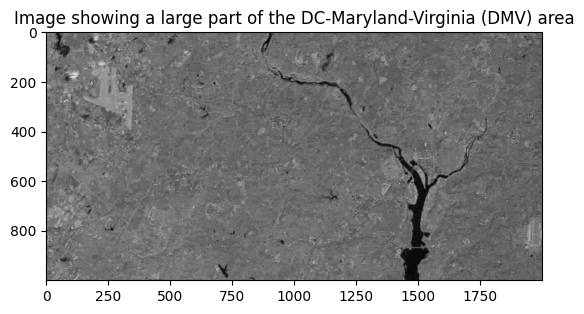

In [20]:
# Example
import rasterio
import matplotlib.pyplot as plt

image_path = "LC08_L1TP_015033_20260119_20260119_02_RT_refl.tif"

dataset = rasterio.open(image_path)

image = dataset.read()

band1 = image[0]

# Broadly cropping the DMV
# These index values relate to the raster tile (not geographic) coordinates
crop = band1[3500:4500, 2000:4000]

plt.imshow(crop, cmap="gray")
plt.title("Image showing a large part of the DC-Maryland-Virginia (DMV) area")
plt.show()


Cropping in this manner is purely index-based and does not yet rely on geographic coordinates (the index being the raster tile coordinates). Therefore, the approach is assuming some prior knowledge of where the desired region lies within the image array (which we can estimate by looking at the previous plots). Later in the course we can refine this process using georeferenced bounds for more precise spatial subsetting.

## Exercise 4 - Cropping an image

Now have a go at using indexing to crop the Potomac River as it feeds into the Chesapeake Bay. You do not need to be exact, but you should put effort into understanding how indexing works.

Plot your results, and make sure you use a descriptive title.

In [ ]:
# Put your answer here
